In [8]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.optimize as op
import corner
import emcee
from scipy.optimize import curve_fit
from astropy.stats import median_absolute_deviation
import matplotlib
from matplotlib import colors
import sys
sys.path.append('/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation')
import src
import os
%matplotlib notebook

In [2]:
path = '/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/'

In [3]:
target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
mlsdss = fits.open(target_url)

r_ext = mlsdss[1].data['EXTINCTION'][:,2]
z_ext = mlsdss[1].data['EXTINCTION'][:,4]
ext = r_ext-z_ext
subred = mlsdss[1].data['photometric_sample_subred'] == 1
mask_ext = ext < 0.1

G_ml = mlsdss[1].data['phot_g_mean_mag'][subred*mask_ext]
RP_ml = mlsdss[1].data['phot_rp_mean_mag'][subred*mask_ext]
G_RP_ml = G_ml-RP_ml
ewha_ml = mlsdss[1].data['EWHA'][subred*mask_ext]
ewha_ml_error = mlsdss[1].data['EWHA'][subred*mask_ext]

<IPython.core.display.Javascript object>


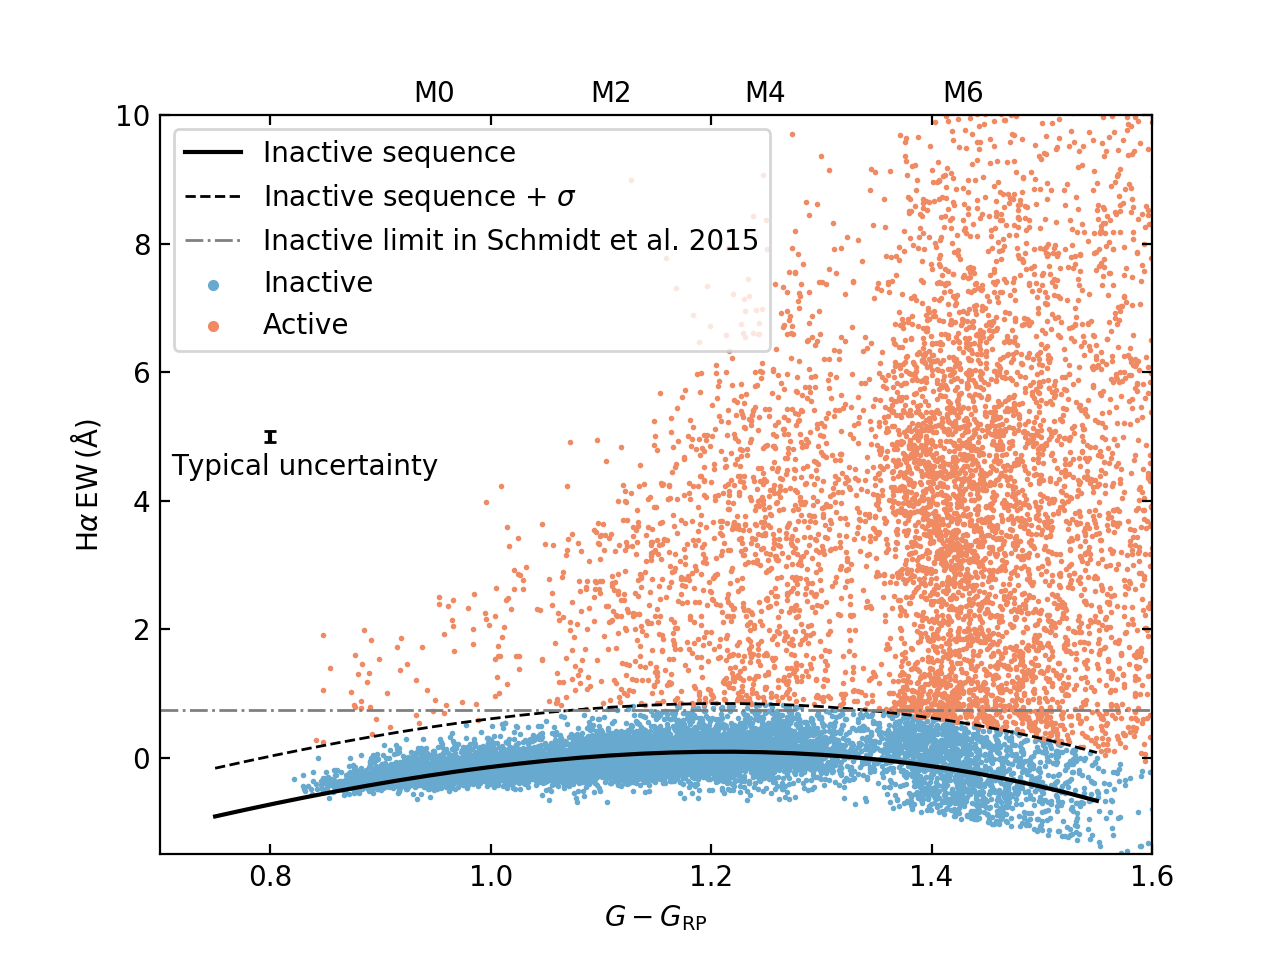

In [40]:
mask_active_ml,mask_inactive_ml,p_inactive_ml = src.get_mask_active_inactive(ewha_ml,G_RP_ml)
mask_late_type = G_RP_ml > 1.4
lw = .5
y_text=10.2
s = 1
x = np.linspace(0.75,1.55,30)
plt.scatter(G_RP_ml[mask_inactive_ml],ewha_ml[mask_inactive_ml],s=s,label='Inactive',
         zorder=0,color='#67a9cf')
plt.scatter(G_RP_ml[mask_active_ml],ewha_ml[mask_active_ml],s=s,label='Active',
         zorder=0,color='#ef8a62')
plt.errorbar(0.8,5,yerr=np.nanmedian(ewha_ml_error),color='k',capsize=2)
plt.text(0.71,4.4,'Typical uncertainty')
plt.plot(x,np.polyval(p_inactive_ml,x),'-k',zorder=2,label='Inactive sequence')
plt.plot(x,np.polyval(p_inactive_ml,x)+0.75,'--k',linewidth=1,zorder=2,label=r'Inactive sequence $+$ $\sigma$')
plt.axhline(y=0.75,color='gray',linestyle='-.',linewidth=1,label='Inactive limit in Schmidt et al. 2015',zorder=2)
plt.legend(loc=2,markerscale=3)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'${\rm H}\alpha \, {\rm EW}\,({\rm \AA})$')
plt.xlim(0.7,1.6)
plt.ylim(-1.5,10)
plt.text(0.93,y_text,'M0')
plt.text(1.09,y_text,'M2')
plt.text(1.23,y_text,'M4')
plt.text(1.41,y_text,'M6')
#plt.text(1.57,y_text,'M8')
plt.savefig(path+'inactive_sequence.png',dpi=300,tight_layout=True)

In [44]:
max(same_star)

nan

In [4]:
catalog = Table.read('../Catalogs/age_calibrators_v2.fits')

mask_not_binaries = catalog['potential_binary'] == 0
ewha = catalog['ewha'][mask_not_binaries]
ewha_error = catalog['ewha_error'][mask_not_binaries]
lewha = np.log10(ewha)
lewha_error = np.array([np.nanstd(np.log10(np.random.normal(ha_i,eha_i,2000))) for ha_i,eha_i in zip(ewha,ewha_error)])
age = catalog['age'][mask_not_binaries]
age_err_low = catalog['age_error_low'][mask_not_binaries]
age_err_high = catalog['age_error_high'][mask_not_binaries]
lage = np.log10(age)
ra = catalog['ra'][mask_not_binaries]
dec = catalog['dec'][mask_not_binaries]
ra_gaia = catalog['ra_gaia'][mask_not_binaries]
dec_gaia = catalog['dec_gaia'][mask_not_binaries]
g = catalog['g_corr'][mask_not_binaries]
rp = catalog['rp_corr'][mask_not_binaries]
g_snr = catalog['phot_g_mean_flux'][mask_not_binaries]/catalog['phot_g_mean_flux_error'][mask_not_binaries]
rp_snr = catalog['phot_rp_mean_flux'][mask_not_binaries]/catalog['phot_rp_mean_flux_error'][mask_not_binaries]
lhalbol = catalog['lhalbol'][mask_not_binaries]
lhalbol_err = catalog['lhalbol_error'][mask_not_binaries]
parallax = catalog['parallax'][mask_not_binaries]
g_abs = g - 5*(np.log10(1e3/parallax)-1)
source_id = catalog['gaia_source_id'][mask_not_binaries]
g_rp = g-rp
group_name = catalog['group_name'][mask_not_binaries]
group_num = catalog['group_num'][mask_not_binaries]
source_ref = catalog['source_ref'][mask_not_binaries]
spt = catalog['spt'][mask_not_binaries]

log_lhalbol,log_lhalbol_error = src.calc_log_lhalbol(ewha,ewha_error,spt)
same_star = catalog['star_index'][mask_not_binaries]


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/src/astro.py:139: RuntimeWarning: invalid value encountered in log10
  dist_log_lhalbol = np.log10(dist_ewha*f_chi(spt[i]))
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/src/astro.py:143: RuntimeWarning: invalid value encountered in log10
  log_lhalbol[i] = np.log10(ewha[i]*f_chi(spt[i]))


<IPython.core.display.Javascript object>


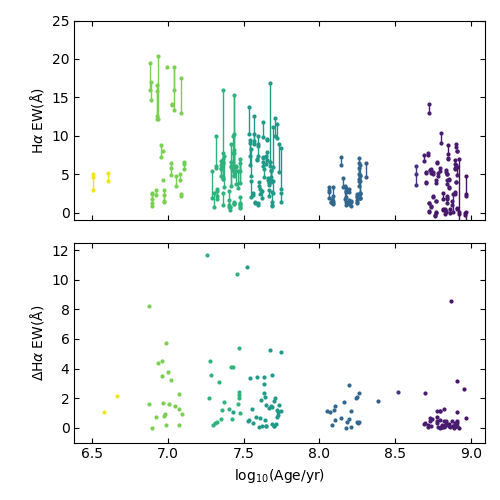

155
242.53125 -18.18241666666667 5.699999999999999
242.87291666666664 -19.008111111111113 8.2
66.306396 17.268217 8.58
75.494975 9.983135 5.379999618530274
341.2414166666666 -33.250416666666666 11.66
23.8080161 -7.2142931 10.4
356.3427083 -71.4473611 5.120000381469726
56.419083333333326 -75.1533611111111 5.259999752044678
62.30887499999999 -40.13386111111111 10.859999656677246


In [9]:
vmin=6.5
vmax=9
cmap = cm.viridis_r
norm = Normalize(vmin=vmin, vmax=vmax)

vmin2=0.8
vmax2=2
cmap2 = cm.magma
norm2 = Normalize(vmin=vmin2, vmax=vmax2)
tot = 0
max_min_array = []
f,(ax1,ax2) = plt.subplots(2,1,figsize=(5,5),sharex=True)
for x in range(1,int(np.nanmax(same_star))):
    mask_same_star = same_star == x
    n = len(age[mask_same_star])
    if(n>1):
        shuffle = np.median(age[mask_same_star])*0.5*(np.random.rand()-0.5)
        ax1.plot(np.log10(age[mask_same_star]+shuffle),
                 ewha[mask_same_star],'o-',
                 label='Age calibrators',linewidth=1,markersize=2,
                 color=cmap(norm(np.log10(age[mask_same_star][0]))))
        tot+=1
print(tot)
#ax1.set_xlim(6.8,9)
ax1.set_ylim(-1,25)
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('both',which='minor',direction='in',top=True,right=True)
#ax1.set_xlabel(r'$\log _{10}Age/$yr')
ax1.set_ylabel(r'${\rm H}\alpha \; {\rm EW} ({\rm \AA})$')

for x in range(1,int(np.nanmax(same_star))):
    mask_same_star = same_star == x
    n = len(age[mask_same_star])
    if(n>1):
        max_min = (np.nanmax(ewha[mask_same_star])-
                   np.nanmin(ewha[mask_same_star]))
        max_min_array.append(max_min)
        #median_ewha = np.median(ewha[mask_same_star])
        shuffle = np.median(age[mask_same_star])*0.5*(np.random.rand()-0.5)
        #print(g_rp[mask_keep*mask_same_star][0])
        ax2.plot(np.log10(age[mask_same_star]+shuffle)[0],
                 max_min,'o-',
                 label='Age calibrators',linewidth=1,markersize=2,
                 color=cmap(norm(np.log10(age[mask_same_star][0]))))
        if(max_min>5):
            #print(x)
            print(ra[mask_same_star][0],dec[mask_same_star][0],max_min)
ax2.set_ylim(-1,12.5)
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('both',which='minor',direction='in',top=True,right=True)
ax2.set_xlabel(r'$\log _{10}({\rm Age}/$yr)')
ax2.set_ylabel(r'$\Delta {\rm H}\alpha \; {\rm EW} ({\rm \AA})$')


plt.tight_layout()
plt.savefig(path+'variability_in_activity_rel.png',dpi=300)

<IPython.core.display.Javascript object>


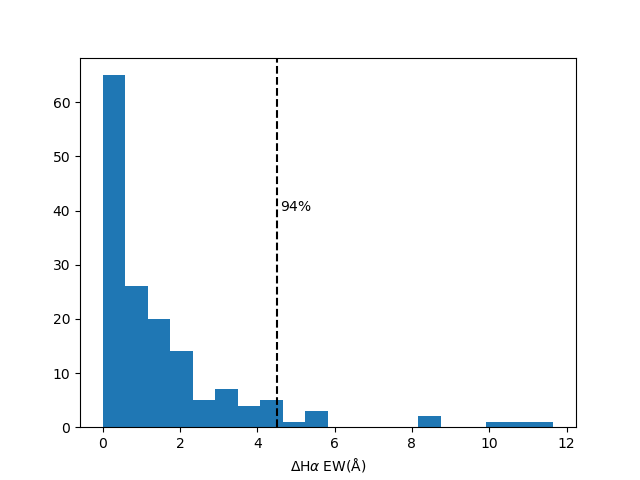

Text(0.5, 0, '$\\Delta {\\rm H}\\alpha \\; {\\rm EW} ({\\rm \\AA})$')

In [12]:
plt.hist(max_min_array,bins=20)
plt.axvline(np.nanpercentile(max_min_array,94),color='k',linestyle='--')
plt.text(4.6,40,r'$94\%$')
plt.xlabel(r'$\Delta {\rm H}\alpha \; {\rm EW} ({\rm \AA})$')

In [7]:
mask_active,mask_inactive,_ = src.get_mask_active_inactive(ewha,g_rp)
mask_binaries = group_num==0

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


In [8]:
vmin = 0.8
vmax = 1.6
x = np.linspace(-1,10,2000)
#idx_simple = np.random.randint(len(flat_samples_simple[:,0]), size=100)

p_inactive = np.array([-22.81938807,108.69676223,-191.72732865,
                       148.87638458,-43.17475922])

x_inactive = np.linspace(10**5,10**11,10)
colors_lhal = np.array([0.8,1.2,1.6])
ewha_lim = np.polyval(p_inactive,colors_lhal) + 0.75 
lhalbol_lim = src.calc_lhalbol(ewha_lim,np.array([0.1,0.1,0.1]),colors_lhal)[0]

y_inactive_high_haew = np.ones(10)*ewha_lim[1]
y_inactive_low_haew = np.ones(10)*-20
y_inactive_high_lha = np.ones(10)*lhalbol_lim[1]
y_inactive_low_lha = np.ones(10)*-20

bins_spt = [0,3,7,10]
colors_list = ['#7570b3','#d95f02','#1b9e77']

cmap=colors.ListedColormap(colors_list)
norm = colors.BoundaryNorm(bins_spt, cmap.N)

<IPython.core.display.Javascript object>


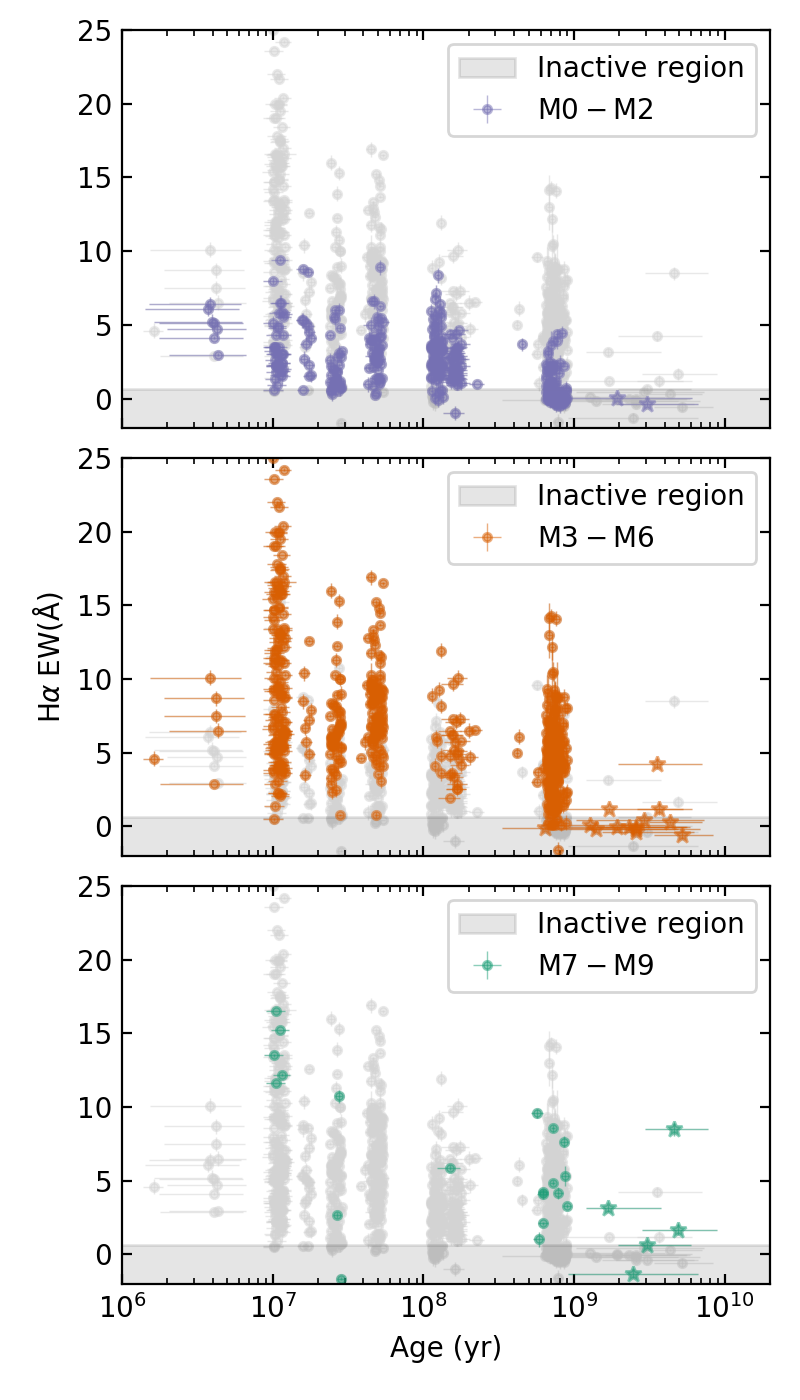

In [9]:
alpha = 0.5
f,ax = plt.subplots(3,1,figsize=(4,7),sharex=True,sharey=True)
ax = ax.ravel()
random = (np.random.rand(len(age)))*age*0.2
random[mask_binaries] = 0
for i,axj in zip(range(len(bins_spt)-1),ax):
    color_spt = colors_list[i]
    mask_spt = (bins_spt[i] <= spt) * (spt < bins_spt[i+1])
    axj.errorbar((age+random),ewha,
                 xerr=(age_err_low,age_err_high),
                 yerr = ewha_error,
                 fmt='.',elinewidth=.5,color='lightgray',zorder=0,alpha=alpha,label=None)#color='#810f7c',
    axj.errorbar((age+random)[~mask_binaries*mask_spt],
                 ewha[~mask_binaries*mask_spt],
                 xerr=(age_err_low[~mask_binaries*mask_spt],age_err_high[~mask_binaries*mask_spt]),
                 yerr = ewha_error[~mask_binaries*mask_spt],
                 fmt='.',elinewidth=.5,color=color_spt,zorder=2,
                 label='M${}-$M${}$'.format(bins_spt[i],bins_spt[i+1]-1),alpha=alpha)#color='#810f7c',
    axj.errorbar((age+random)[mask_binaries*mask_spt],
                 ewha[mask_binaries*mask_spt],
                 xerr=(age_err_low[mask_binaries*mask_spt],age_err_high[mask_binaries*mask_spt]),
                 yerr = ewha_error[mask_binaries*mask_spt],
                 fmt='*',elinewidth=0.5,color=color_spt,zorder=2,alpha=alpha,label=None)#color='#8c96c6',
    axj.fill_between(x_inactive,y_inactive_low_haew,y_inactive_high_haew,color='k',alpha=0.1,label='Inactive region')
    axj.legend()
    axj.tick_params('both',direction='in',top=True,right=True)
    axj.tick_params('both',which='minor',direction='in',top=True,right=True)

    
plt.xlabel(r'Age (yr)')
ax[1].set_ylabel(r'${\rm H}\alpha \; {\rm EW} ({\rm \AA})$')
plt.xscale('log')
#ax1.set_yscale('log')
plt.ylim(-2,25)
plt.xlim(10**6,10**10.3)

#ax2.set_ylim(1e-5,3*1e-3)
#plt.ylim(1e-6,1e-3)
plt.tight_layout()
plt.savefig(path+'ageactivity_a_2.png',dpi=300,tight_layout=True,bbox_inches = 'tight')
plt.show()

<IPython.core.display.Javascript object>


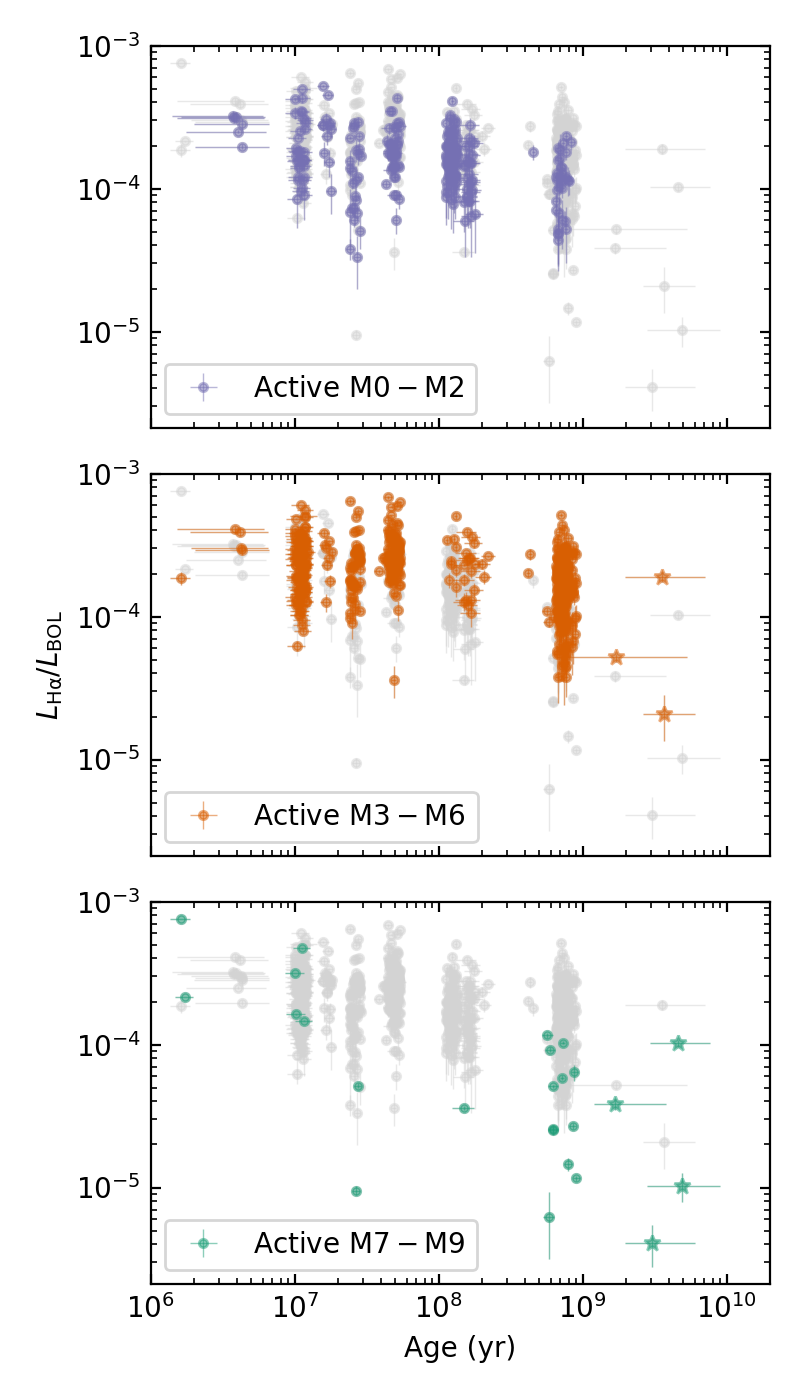

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [10]:
alpha = 0.5
f,ax = plt.subplots(3,1,figsize=(4,7),sharex=True,sharey=True)
ax = ax.ravel()
for i,axj in zip(range(len(bins_spt)-1),ax):
    color_spt = colors_list[i]
    mask_spt = (bins_spt[i] <= spt) * (spt < bins_spt[i+1])
    mask_all = mask_active*(ewha/ewha_error>2)
    mask_lhal_not_binaries = (~mask_binaries)*mask_spt*mask_active*(ewha/ewha_error>2)
    mask_lhal_binaries = mask_binaries*mask_spt*mask_active*(ewha/ewha_error>2)
    axj.errorbar((age+random)[mask_all],lhalbol[mask_all],
                 xerr=(age_err_low[mask_all],age_err_high[mask_all]),
                 yerr = lhalbol_err[mask_all],
                 fmt='.',elinewidth=.5,color='lightgray',zorder=0,alpha=alpha,label=None)#color='#810f7c',
    axj.errorbar((age+random)[mask_lhal_not_binaries],
                 lhalbol[mask_lhal_not_binaries],
                 xerr=(age_err_low[mask_lhal_not_binaries],age_err_high[mask_lhal_not_binaries]),
                 yerr = lhalbol_err[mask_lhal_not_binaries],
                 fmt='.',elinewidth=.5,color=color_spt,zorder=2,
                 label='Active M${}-$M${}$'.format(bins_spt[i],bins_spt[i+1]-1),alpha=alpha)#color='#810f7c',
    axj.errorbar((age+random)[mask_lhal_binaries],
                 lhalbol[mask_lhal_binaries],
                 xerr=(age_err_low[mask_lhal_binaries],age_err_high[mask_lhal_binaries]),
                 yerr = lhalbol_err[mask_lhal_binaries],
                 fmt='*',elinewidth=0.5,color=color_spt,zorder=2,alpha=alpha,label=None)#color='#8c96c6',
    axj.legend(loc=3)
    axj.tick_params('both',direction='in',top=True,right=True)
    axj.tick_params('both',which='minor',direction='in',top=True,right=True)

plt.xlabel(r'Age (yr)')
ax[1].set_ylabel(r'$L_{\rm H\alpha}/L_{\rm BOL}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**10.3)

#ax2.set_ylim(1e-5,3*1e-3)
#plt.ylim(1e-6,1e-3)

plt.tight_layout()
plt.savefig(path+'ageactivity_b_2.png',dpi=300,tight_layout=True,bbox_inches = 'tight')
plt.show()

In [11]:
bins_age_young = np.linspace(0,1000,30)*1e6
bins_age_old = np.linspace(1,13,5)*1e9
age_adjusted = np.copy(age)
spt_adjusted = np.copy(spt)
for i in range(len(bins_age_young)-1):
    mask = (bins_age_young[i]<= age_adjusted)  * (age_adjusted < bins_age_young[i+1])
    age_adjusted[mask] = np.round(np.log10(bins_age_young[i] + (bins_age_young[i+1]-bins_age_young[i])/2),2)
for i in range(len(bins_age_old)-1):
    mask = (bins_age_old[i]<= age_adjusted)  * (age_adjusted < bins_age_old[i+1])
    age_adjusted[mask] = np.round(np.log10(bins_age_old[i] + (bins_age_old[i+1]-bins_age_old[i])/2),2)
for i in range(len(bins_spt)-1):
    mask = (bins_spt[i]<= spt_adjusted)  * (spt_adjusted < bins_spt[i+1])
    spt_adjusted[mask] = bins_spt[i]
spt_adjusted[np.logical_or(bins_spt[0]> spt_adjusted,bins_spt[-1]<= spt_adjusted)] = np.nan

In [12]:
N=20
n_step = 4
age_bin = np.linspace(6,10,N)
age_ba = age_bin + (age_bin[n_step]-age_bin[0])/2
log_age = np.log10(age)

In [13]:
(age_bin[n_step]-age_bin[0])

0.8421052631578947

<IPython.core.display.Javascript object>


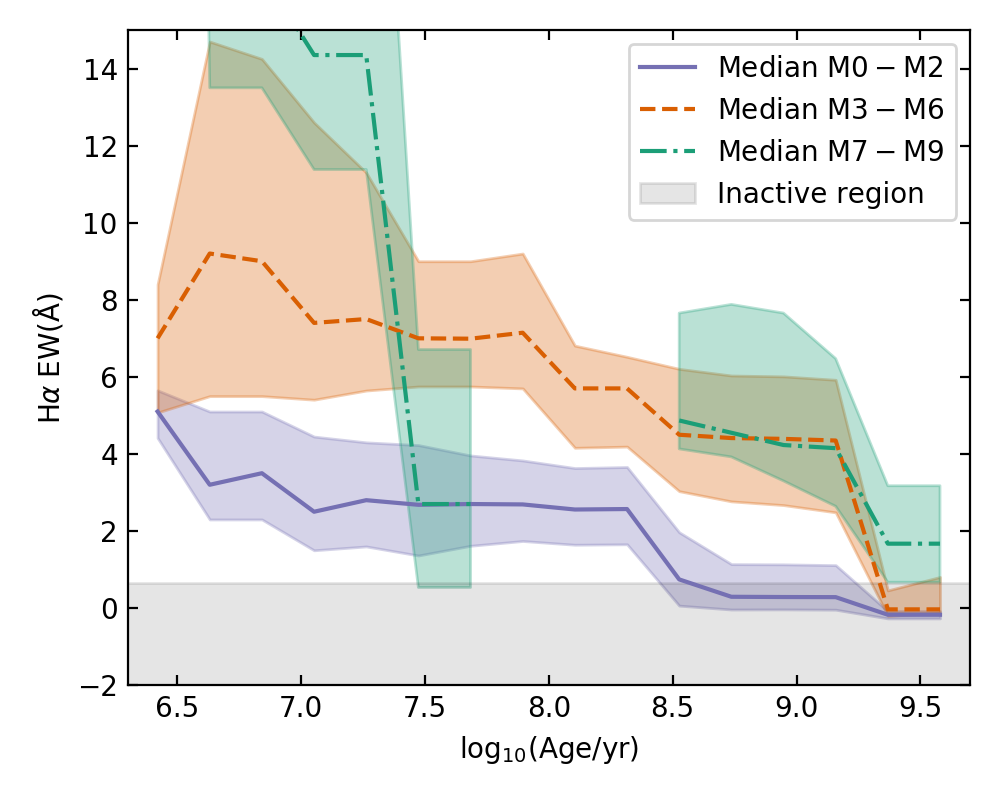

In [14]:
f=plt.figure(figsize=(5,4))
for x,color_x,marker_x,label_i in zip(bins_spt,colors_list,['-','--','-.'],
                                      ['Median M$0-$M$2$','Median M$3-$M$6$','Median M$7-$M$9$']):
    mask_spt = spt_adjusted == x
    median_ba = np.ones(N)*np.nan
    perc_high_ba = np.ones(N)*np.nan
    perc_low_ba = np.ones(N)*np.nan
    for i in range(N-n_step):
        mask = (age_bin[i] <= log_age) * (log_age < age_bin[i+n_step]) * mask_spt * (~np.isnan(ewha))
        if(len(ewha[mask])>1):
            median_ba[i] = np.median(ewha[mask])
            perc_high_ba[i] = np.percentile(ewha[mask],75)
            perc_low_ba[i] = np.percentile(ewha[mask],25)
    plt.fill_between(age_ba,perc_low_ba,perc_high_ba,color=color_x,alpha=0.3)
    plt.plot(age_ba,median_ba,color=color_x,linestyle=marker_x,label=label_i)
plt.fill_between(np.log10(x_inactive),y_inactive_low_haew,y_inactive_high_haew,
                 color='k',alpha=0.1,label='Inactive region')
plt.legend()
plt.ylim(-2,15)
plt.xlim(6.3,9.7)
plt.xlabel(r'$\log _{10}({\rm Age}/{\rm yr})$')
plt.ylabel(r'${\rm H}\alpha \; {\rm EW} ({\rm \AA})$')
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.tight_layout()
plt.savefig(path+'median_ageactivity_a.pdf',bbox_inches='tight')

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


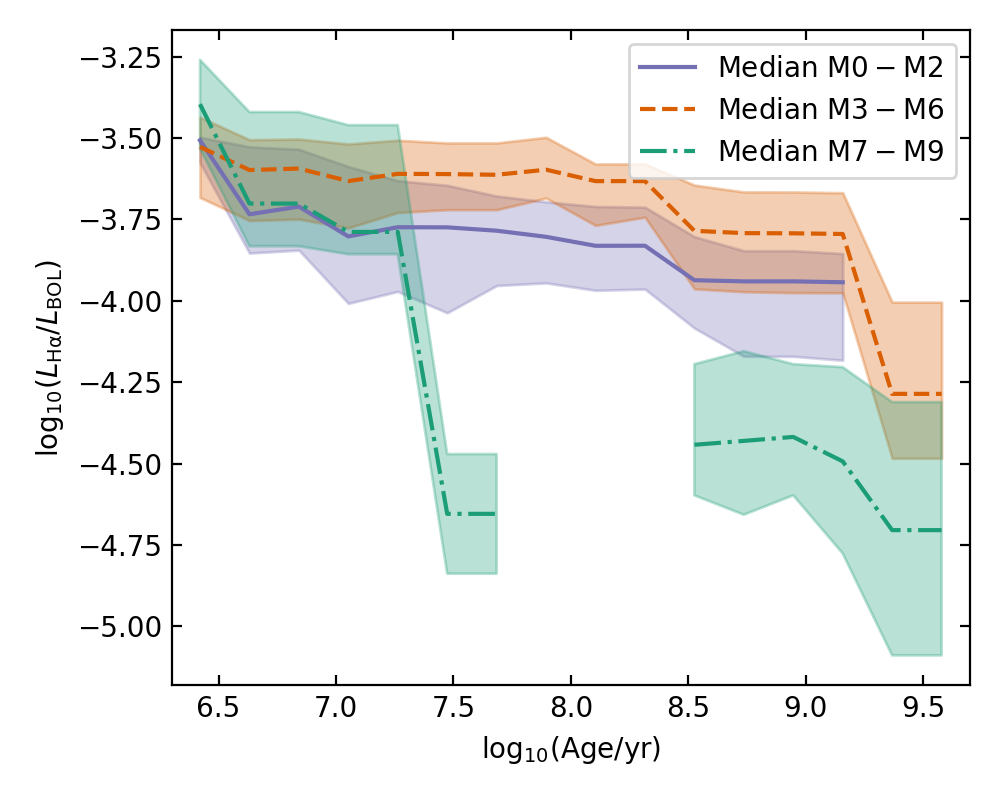

In [15]:
log_lhalbol = np.log10(lhalbol)
f=plt.figure(figsize=(5,4))
for x,color_x,marker_x,label_i in zip(bins_spt,colors_list,['-','--','-.'],
                                      ['Median M$0-$M$2$','Median M$3-$M$6$','Median M$7-$M$9$']):
    mask_spt = spt_adjusted == x
    median_ba = np.ones(N)*np.nan
    perc_high_ba = np.ones(N)*np.nan
    perc_low_ba = np.ones(N)*np.nan
    for i in range(N-n_step):
        mask = (age_bin[i] <= log_age) * (log_age < age_bin[i+n_step]) * mask_spt * (~np.isnan(log_lhalbol)) * mask_active
        if(len(ewha[mask])>1):
            median_ba[i] = np.median(log_lhalbol[mask])
            perc_high_ba[i] = np.percentile(log_lhalbol[mask],75)
            perc_low_ba[i] = np.percentile(log_lhalbol[mask],25)
    plt.fill_between(age_ba,perc_low_ba,perc_high_ba,color=color_x,alpha=0.3)
    plt.plot(age_ba,median_ba,color=color_x,linestyle=marker_x,label=label_i)
plt.legend()
#plt.ylim(-2,15)
plt.xlim(6.3,9.7)
plt.xlabel(r'$\log _{10}({\rm Age}/{\rm yr})$')
plt.ylabel(r'$\log _{10}(L_{\rm H\alpha}/L_{\rm BOL})$')
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.tight_layout()
plt.savefig(path+'median_ageactivity_b.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


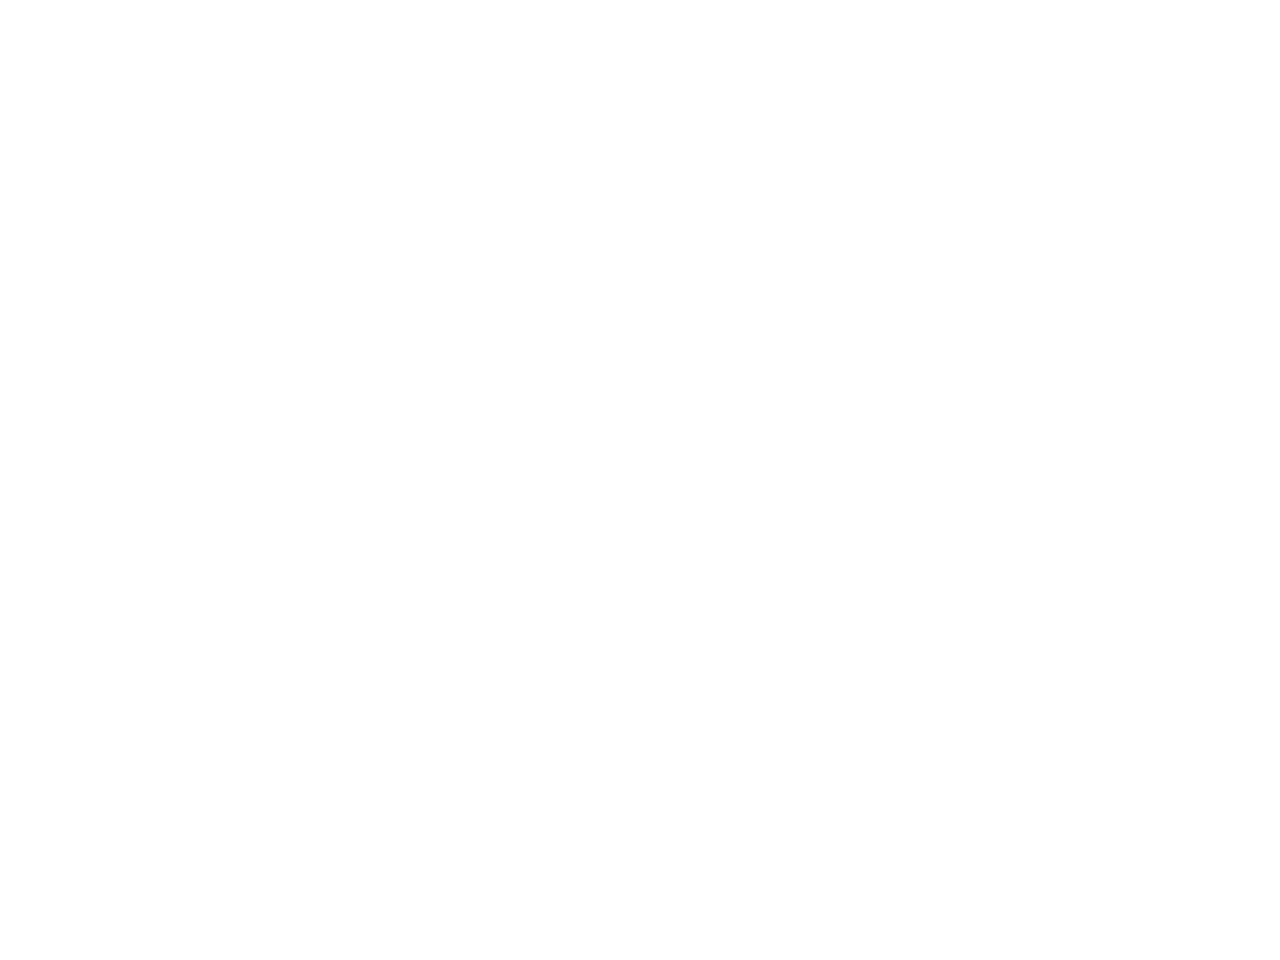

In [16]:
mask_good = mask_active*(~np.isnan(lage+log_lhalbol+log_lhalbol_error))
chain_simple1,flat_samples_simple1 = src.fit_relation_bpl(mask_good,lage,log_lhalbol,log_lhalbol_error,
                                                        ini_params = np.array([8.61700364, -0.1, -3.8 , -0.87,.5]),
                                                        sigma_random = 0.001,
                                                        name_file_auto_corr='../data/auto_corr1.png')

In [17]:
'all active age-calibrator: {}'.format(len(lage[mask_good]))

'all active age-calibrator: 856'

In [18]:
if(os.path.exists('../data/results_fit.txt')):
    os.remove('../data/results_fit.txt')
    
results_fit = open('../data/results_fit.txt','a')
results_fit.write('#log_t0\talpha1\tbeta1\talpha2\tsigma_v\n')
for idx_j in range(len(flat_samples_simple1[:,0])):
    results_fit.write(str(flat_samples_simple1[idx_j,0]) + '\t'+
                      str(flat_samples_simple1[idx_j,1])+ '\t'+
                      str(flat_samples_simple1[idx_j,2])+ '\t'+
                      str(flat_samples_simple1[idx_j,3])+ '\t' +
                      str(flat_samples_simple1[idx_j,4])+ '\n')
results_fit.close()

<IPython.core.display.Javascript object>


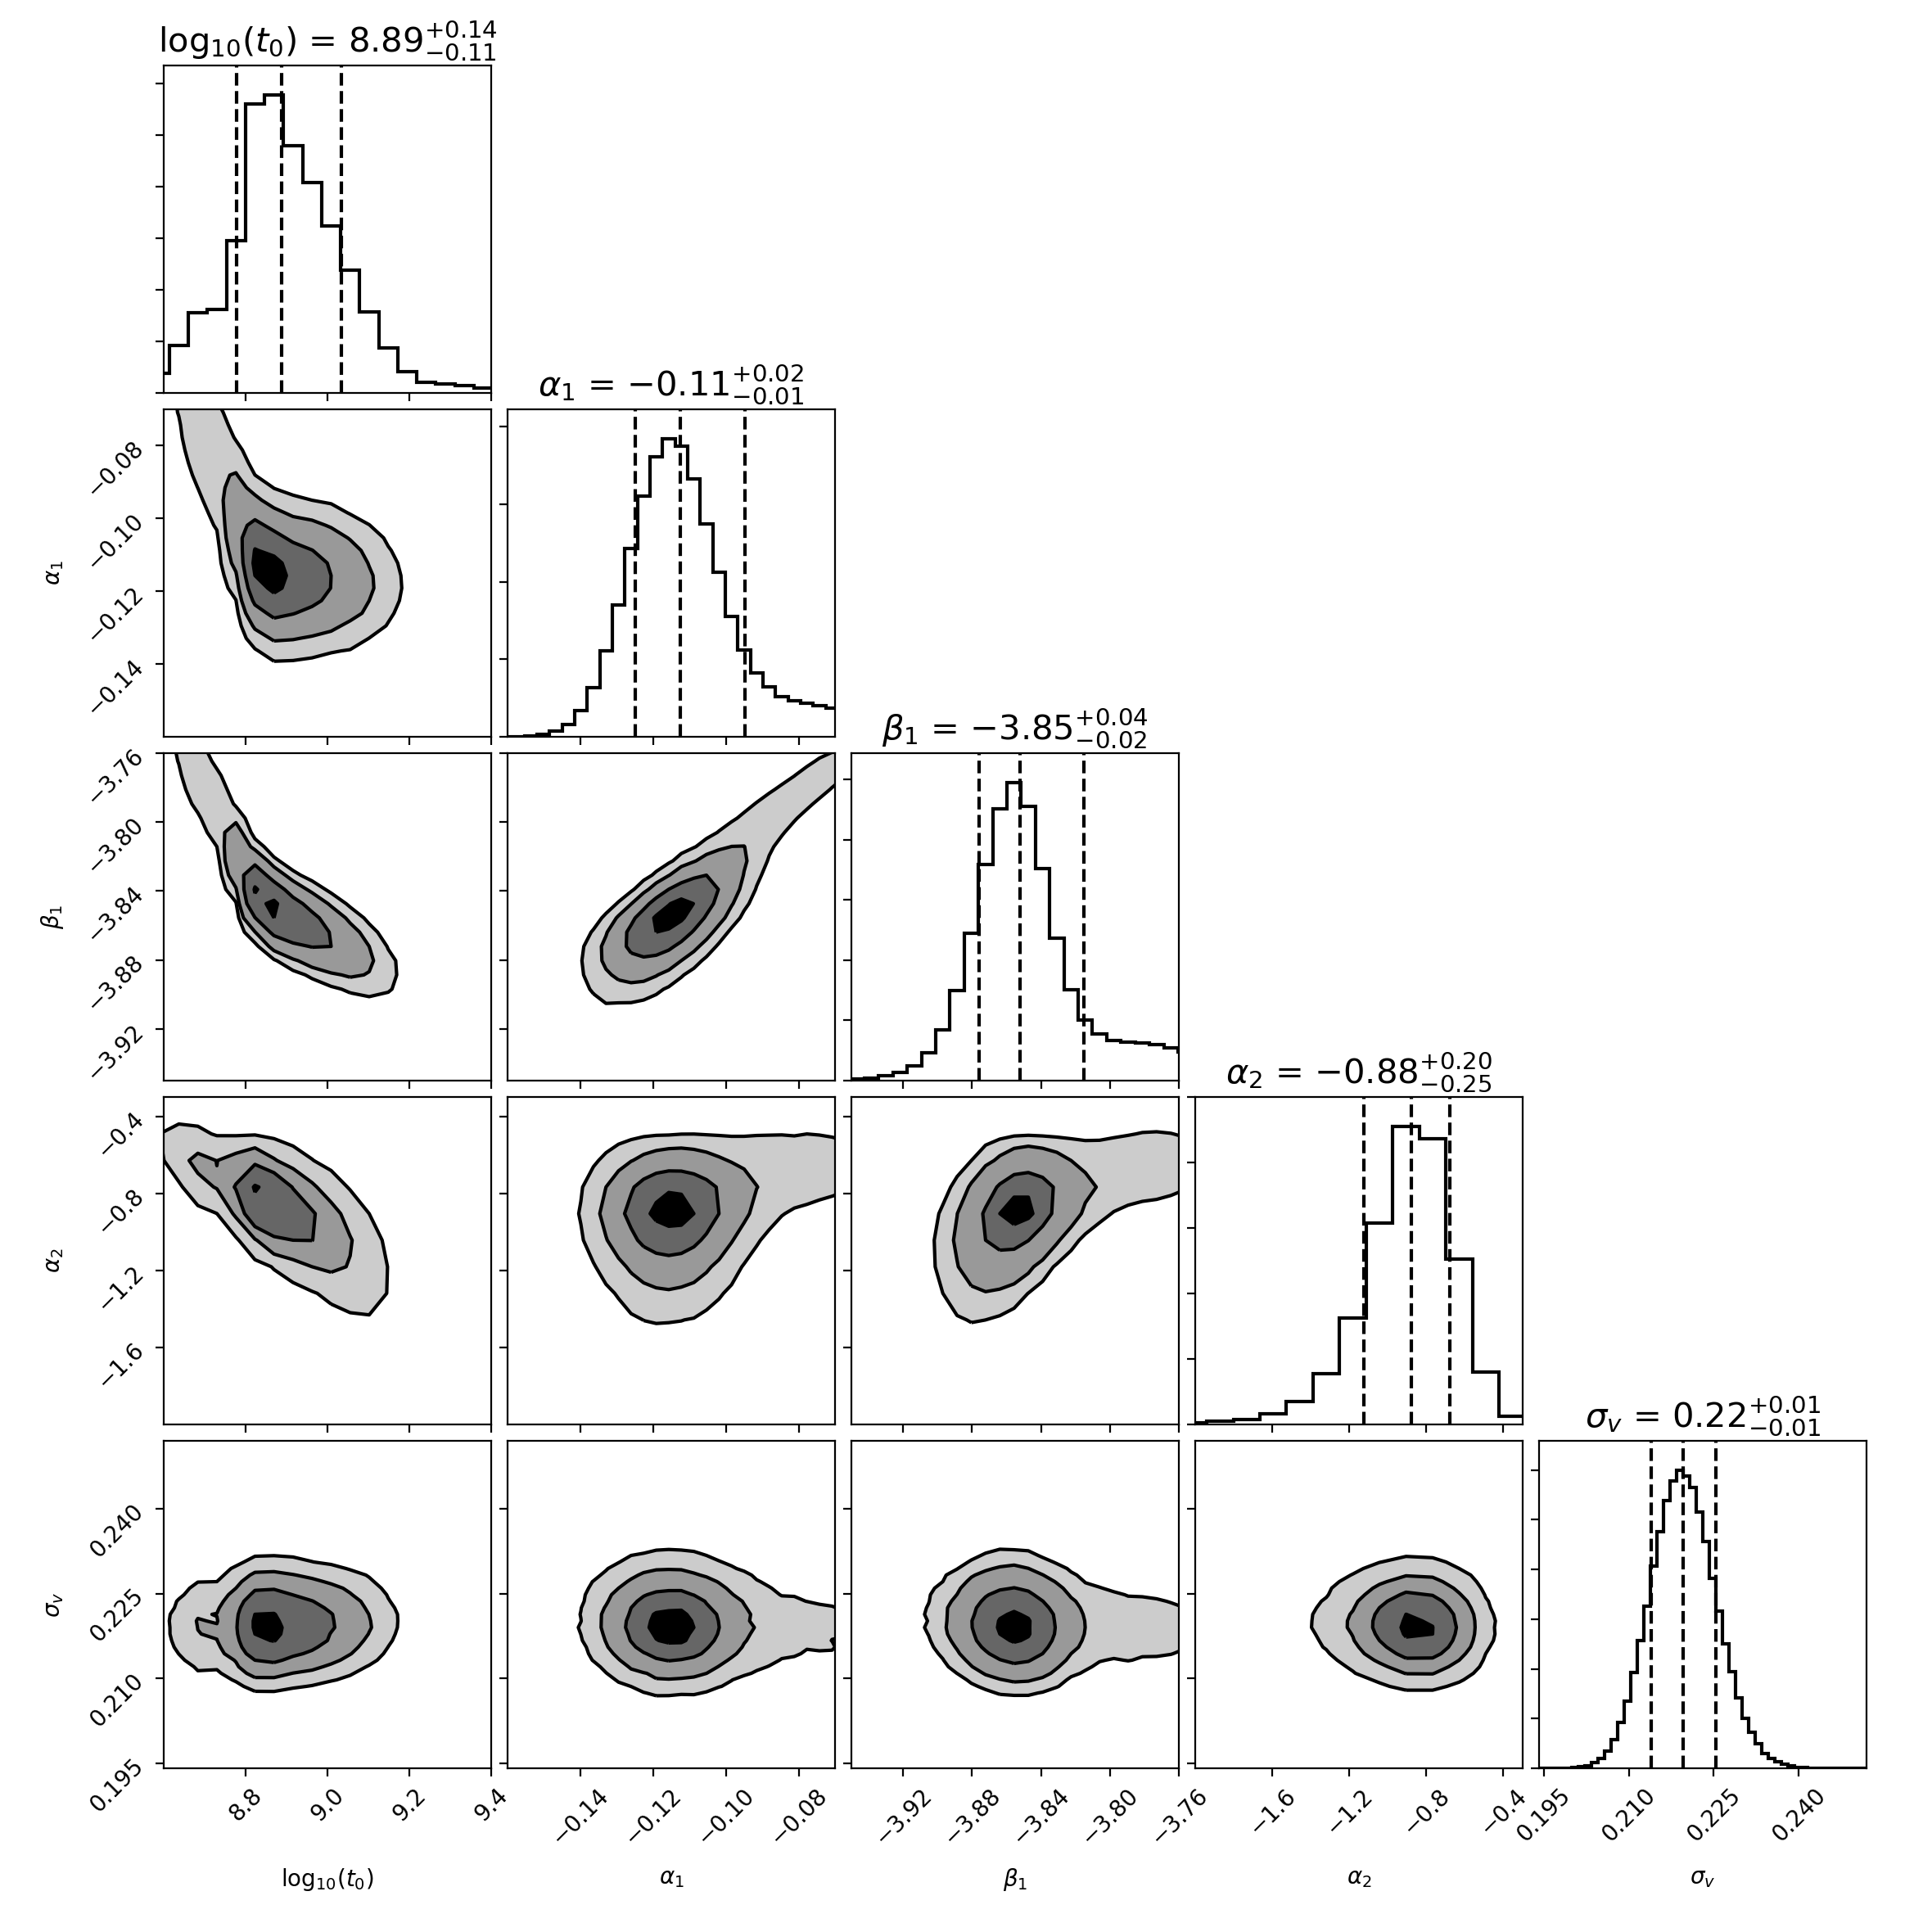

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


In [19]:

labels = [r'$\log _{10}(t_0)$',r'$\alpha _1$',r'$\beta _1$',r'$\alpha _2$',r'$\sigma _v$']

fig = corner.corner(flat_samples_simple1,labels=labels,quantiles=[.16,.50,.84],
                    show_titles=True, title_fmt=".2f",title_kwargs={"fontsize": 15},plot_datapoints=False,
                    fill_contours=True,bins=50,
                    contourf_kwargs={"linewidth": 12}, hist_kwargs={"linewidth": 1.5})

ndim = 5 
# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the histograms
axes[1,0].set_ylim(-0.16,-0.07)
for i in range(ndim):
    axes[i,0].set_xlim(8.6,9.4)
for i in range(ndim):
    axes[i,1].set_xlim(-0.16,-0.07)

axes[1,0].set_ylim(-0.16,-0.07)
for i in range(ndim):
    axes[i,2].set_xlim(-3.95,-3.76)
for j in range(2):
    axes[2,j].set_ylim(-3.95,-3.76)
for i in range(ndim):
    axes[i,3].set_xlim(-2.,-0.3)
for j in range(3):
    axes[3,j].set_ylim(-2.,-0.3)

        
dropbox = '/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf'
path = dropbox+'/Age-Activity Relation for M dwarfs/''corner_fit_simple1.pdf'
fig.savefig(path,dpi=300)

In [20]:
results_fit = np.loadtxt('../data/results_fit.txt')
#results_fit2 = np.loadtxt('data/results_fit2.txt')

In [21]:
hp = 100
lp = 0
mp=50
median = np.array([np.percentile(flat_samples_simple1[:,0],mp),
                      np.percentile(flat_samples_simple1[:,1],mp),
                      np.percentile(flat_samples_simple1[:,2],mp),
                      np.percentile(flat_samples_simple1[:,3],mp),
                      np.percentile(flat_samples_simple1[:,4],mp)])

high_perc = np.array([np.percentile(flat_samples_simple1[:,0],hp),
                      np.percentile(flat_samples_simple1[:,1],hp),
                      np.percentile(flat_samples_simple1[:,2],hp),
                      np.percentile(flat_samples_simple1[:,3],hp),
                      np.percentile(flat_samples_simple1[:,4],hp)])
low_perc = np.array([np.percentile(flat_samples_simple1[:,0],lp),
                      np.percentile(flat_samples_simple1[:,1],lp),
                      np.percentile(flat_samples_simple1[:,2],lp),
                      np.percentile(flat_samples_simple1[:,3],lp),
                      np.percentile(flat_samples_simple1[:,4],lp)])


<IPython.core.display.Javascript object>


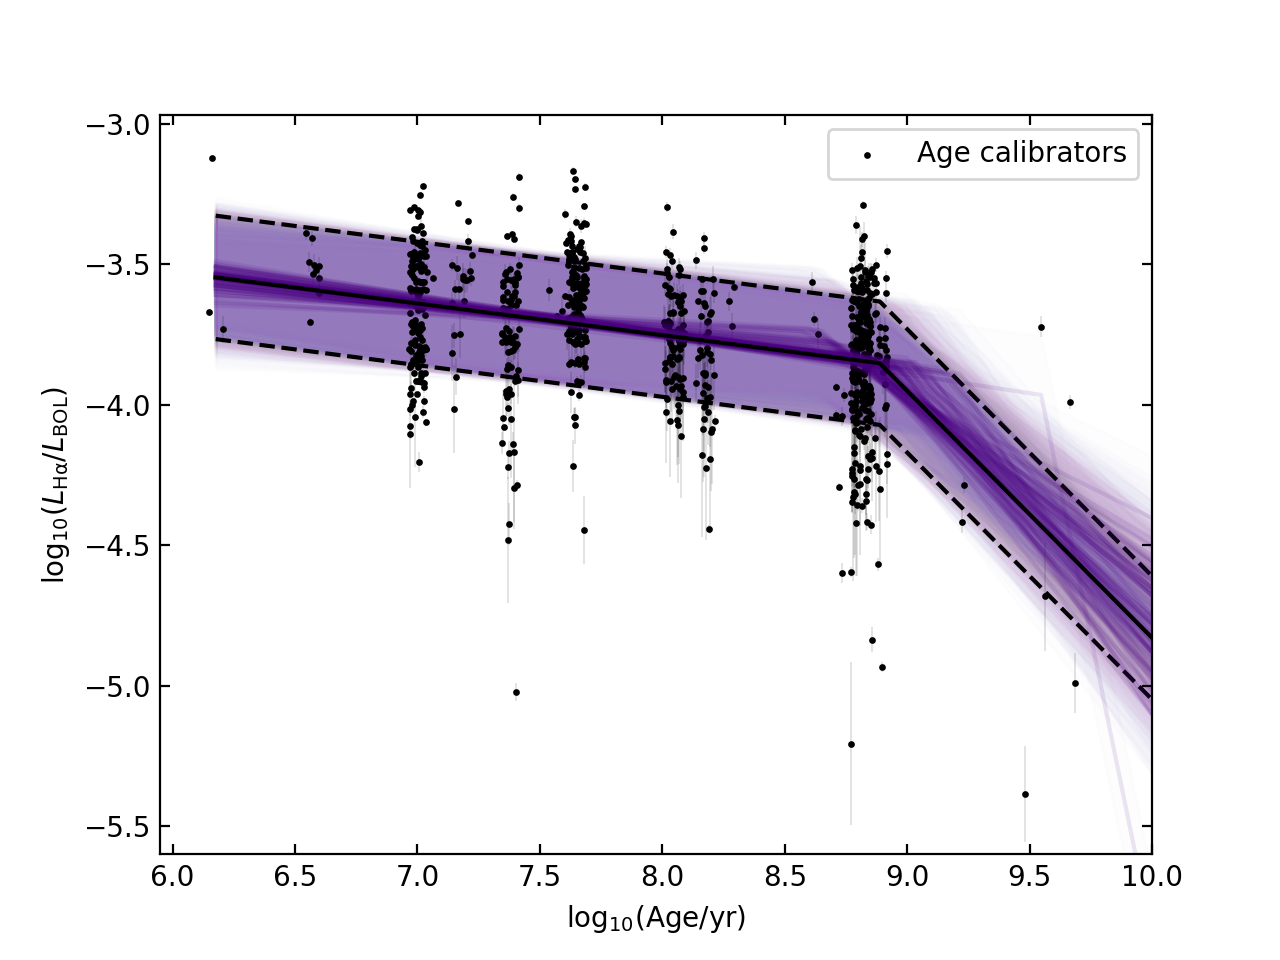

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/Users/rociokiman/Documents/M-dwarfs-Age-Activity-Relation/src/fit_age_activity_relation.py:20: RuntimeWarning: invalid value encountered in less
  mask = log_age < log_t0
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log10
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


In [22]:
mask_good = mask_active*(ewha/ewha_error>2)*(~np.isnan(lage+log_lhalbol+log_lhalbol_error))
mask_binaries = group_num==0
vmin = 0.8
vmax = 1.6
path = '/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/'
x = np.linspace(-1,10,2000)

cmap = colors.ListedColormap(colors_list)
boundaries = bins_spt
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

#plt.pcolormesh(x,y,Z, cmap=cmap, norm=norm)

#cmap = matplotlib.cm.get_cmap(np.array(colors_list), 3)

random = (np.random.rand(len(lage))-0.5)*lage*0.01
random[mask_binaries] = 0

plt.errorbar((lage+random)[mask_good],
             log_lhalbol[mask_good],
             yerr = log_lhalbol_error[mask_good],
             elinewidth=.08,color='k',zorder=3,fmt='none',label=None)
plt.scatter((lage+random)[mask_good],
             log_lhalbol[mask_good],
             label='Age calibrators',color='k',zorder=3,s=2)
#plt.scatter(age[mask_good],lhalbol[mask_good],c=spt[mask_good],s=3.5,zorder=2, cmap=cmap, norm=norm)

index = np.random.randint(0,len(results_fit[:,0]),100)
for idx_j in results_fit[index]:
    plt.plot(np.log10(x*1e9),src.fit_halpha_bpl(idx_j,np.log10(x*1e9)),
             color='indigo',alpha=0.1,zorder=3)
    plt.fill_between(np.log10(x*1e9),src.fit_halpha_bpl(idx_j,np.log10(x*1e9))+idx_j[4],
                     src.fit_halpha_bpl(idx_j,np.log10(x*1e9))-idx_j[4],alpha=0.01,color='tab:purple')
plt.plot(np.log10(x*1e9),src.fit_halpha_bpl(median,np.log10(x*1e9)),
         color='k',linestyle='-',zorder=3)
plt.plot(np.log10(x*1e9),src.fit_halpha_bpl(median,np.log10(x*1e9))+median[4],'--',color='k')
plt.plot(np.log10(x*1e9),src.fit_halpha_bpl(median,np.log10(x*1e9))-median[4],'--',color='k')
    
    
plt.xlabel(r'$\log _{10}({\rm Age}/{\rm yr})$')
plt.ylabel(r'$\log _{10}(L_{\rm H\alpha}/L_{\rm BOL})$')
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(-5.6,None)
plt.xlim(None,10)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',top=True,right=True)
plt.legend()
#plt.colorbar(label='SpT')
plt.savefig(path+'ageactivity_fit.png',dpi=300)
plt.show()


<IPython.core.display.Javascript object>


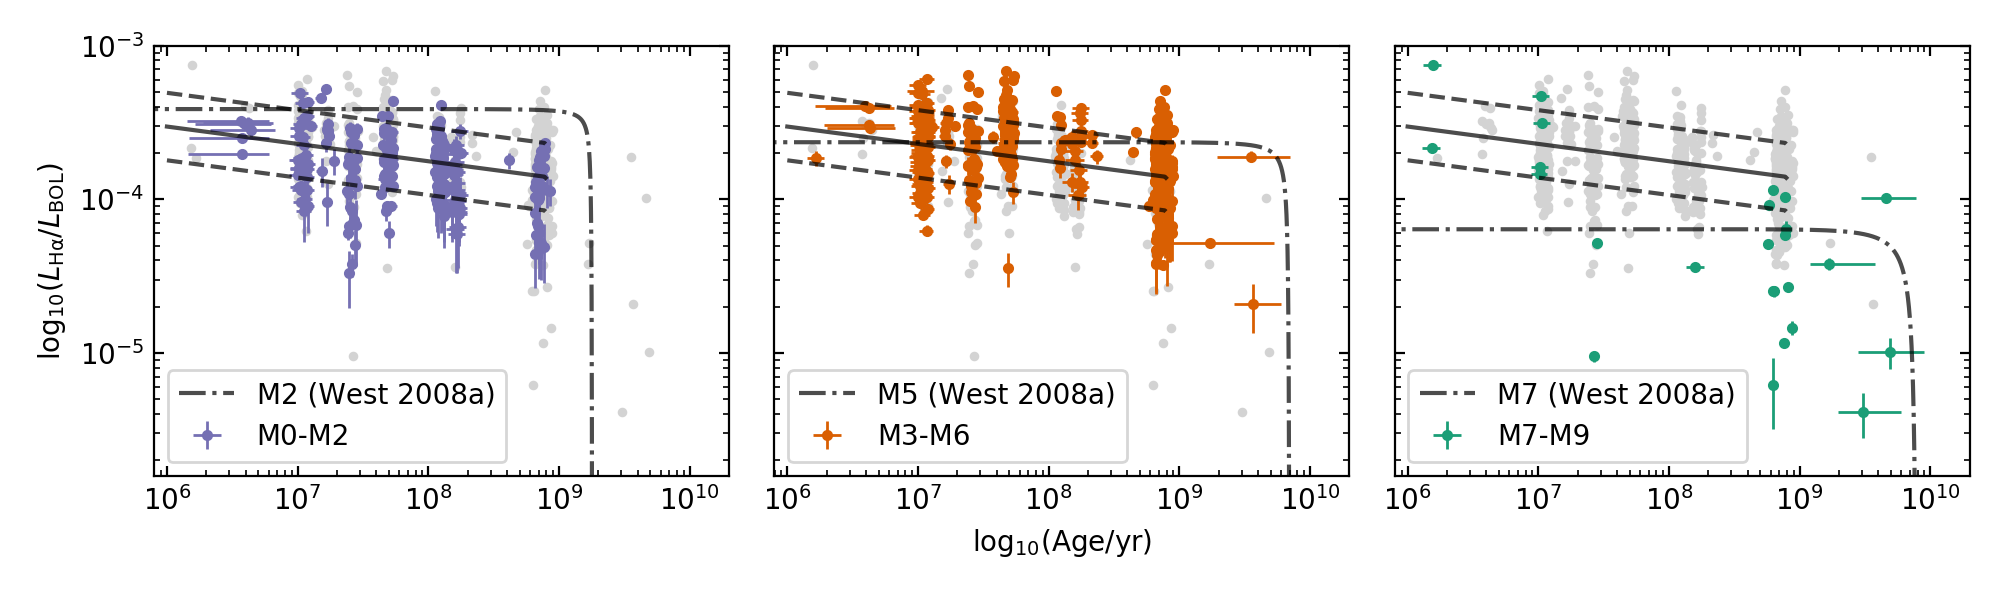

In [23]:
vmin = 0.8
vmax = 1.65
s=6
lw=1

mask_lhalbol = (ewha/ewha_error>2)*mask_active

mask_color_1 = (0 <= spt) * (spt < 3)
mask_color_2 = (3 <= spt) * (spt < 7)
mask_color_3 = (7 <= spt) * (spt < 10)


cmap = cm.magma
norm = Normalize(vmin=vmin, vmax=vmax)

color1 = colors_list[0]#cmap(norm(1.09)) #M2
color2 = colors_list[1]#cmap(norm(1.32)) #M5
color3 = colors_list[2]#cmap(norm(1.47)) #M7

x1 = np.linspace(-10,9,2000)
x = np.linspace(0.001,0.79,2000)
random = (np.random.rand(len(age)))*age*0.2
random[mask_binaries] = 0

f, axs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(10,3))
axs = axs.ravel()

labels_spt = ['M0-M2','M3-M6','M7-M9']
labels_fit = ['M2 (West 2008a)','M5 (West 2008a)','M7 (West 2008a)']
fits_numbers = [[0.106,3.38,2.0,1.8],[2.85,3.57,2.0,7.0],[11.8,4.01,2.0,8.0]]
mask_colors = [mask_color_1,mask_color_2,mask_color_3]
colors_list = [color1,color2,color3]
for ax,labels_spt_i,labels_fit_i,mask_colors_i,colors_i,p in zip(axs,labels_spt,labels_fit,mask_colors,
                                                                 colors_list,fits_numbers):
    ax.scatter((age+random)[mask_lhalbol],lhalbol[mask_lhalbol],s=s,color='lightgrey',label=None)
    ax.errorbar((age+random)[mask_lhalbol * mask_colors_i],lhalbol[mask_lhalbol * mask_colors_i],
                 xerr=(age_err_low[mask_lhalbol * mask_colors_i],
                       age_err_high[mask_lhalbol * mask_colors_i]),
                 yerr=lhalbol_err[mask_lhalbol * mask_colors_i],elinewidth=lw,color=colors_i,fmt='.',
                 label=labels_spt_i)
    ax.plot(x*1e9,10**src.fit_halpha_bpl(median,np.log10(x*1e9)),
             color='k',linestyle='-',zorder=3,alpha=0.7)
    ax.plot(x*1e9,10**(src.fit_halpha_bpl(median,np.log10(x*1e9))+median[4]),'--',color='k',zorder=3,alpha=0.7)
    ax.plot(x*1e9,10**(src.fit_halpha_bpl(median,np.log10(x*1e9))-median[4]),'--',color='k',zorder=3,alpha=0.7)
    ax.plot(x1*1e9,10**src.west2008(x1,*p),
             color='k',linestyle='-.',label=labels_fit_i,zorder=3,alpha=0.7)

    ax.legend(loc=3)
    

axs[1].set_xlabel(r'$\log _{10}({\rm Age}/{\rm yr})$')
axs[0].set_ylabel(r'$\log _{10}(L_{\rm H\alpha}/L_{\rm BOL})$')

axs[0].tick_params('both',direction='in',top=True,right=True)
axs[0].tick_params('both',which='minor',direction='in',top=True,right=True)
axs[1].tick_params('both',direction='in',top=True,right=True)
axs[1].tick_params('both',which='minor',direction='in',top=True,right=True)
axs[2].tick_params('both',direction='in',top=True,right=True)
axs[2].tick_params('both',which='minor',direction='in',top=True,right=True)

plt.xlim(10**(5.9),10**(10.3))
plt.ylim(10**(-5.8),10**(-3))

plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
path = '/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/'
plt.savefig(path+'age_activity_rel_fit.png',dpi=300,tight_layout=True)